# Upper Confidence Bound

[A very great 4 minutes video on confidence interval](https://www.youtube.com/watch?v=tFWsuO9f74o)

### Data preprocessing

In [1]:
# Importing the dataset
dataset = read.csv('Ads_CTR_Optimisation.csv')

In [2]:
head(dataset, 10)

Ad.1,Ad.2,Ad.3,Ad.4,Ad.5,Ad.6,Ad.7,Ad.8,Ad.9,Ad.10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0


### Implementing the Upper Confidence Bound

In [3]:
N = dim(dataset)[1]
d = dim(dataset)[2]
ads_selected = integer(0)

nb_of_sel = integer(d) # Number of Selections
sum_of_rwd = integer(d) # Sums of reward
total_reward = 0

for (n in 1:N){
    ad = 0
    max_upper_bound = 0
    for(i in 1:d){
        if(nb_of_sel[i] > 0){
            average_reward = sum_of_rwd[i] / nb_of_sel[i]
            delta_i = sqrt(3/2 * log(n) / nb_of_sel[i])
            upper_bound = average_reward + delta_i
        }
        else{
            upper_bound = 1e400
        }
        if(upper_bound > max_upper_bound){
            max_upper_bound = upper_bound
            ad = i
        }
    }
    ads_selected = append(ads_selected, ad)
    nb_of_sel[ad] = nb_of_sel[ad] + 1
    reward = dataset[n, ad]
    sum_of_rwd[ad] = sum_of_rwd[ad] + reward
    total_reward = total_reward + reward
}

In [4]:
total_reward

[1] 2178

In [5]:
# Best ad having highest convergent rate can be found by checking last few data of ads_selected
ads_selected[9980:10000]

[1] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

### Visualizing the results

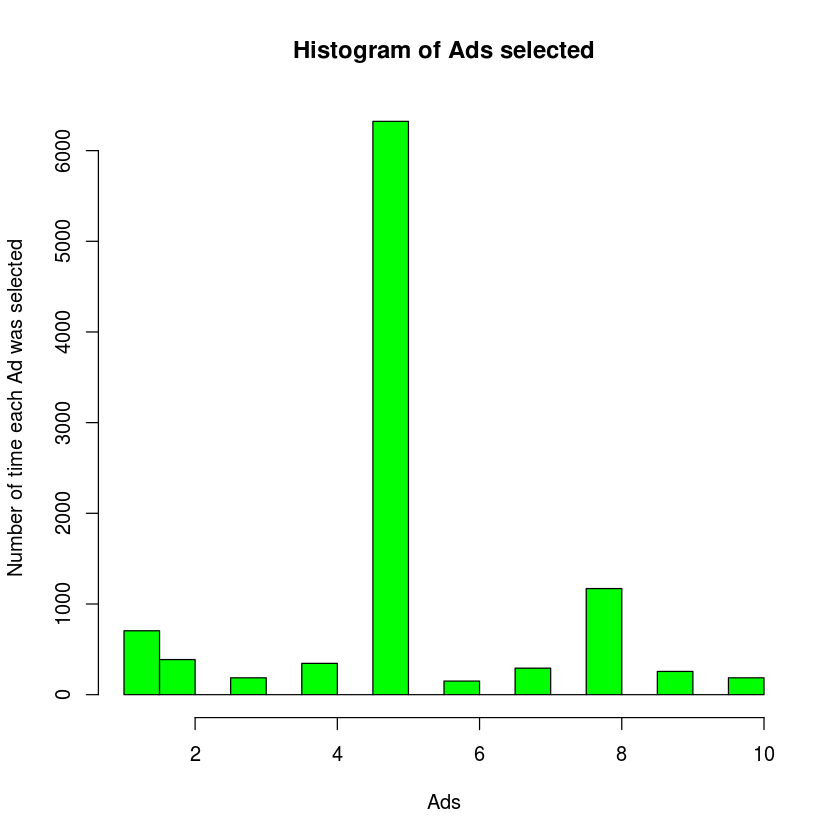

In [6]:
hist(ads_selected, 
     col = 'green', 
     main = 'Histogram of Ads selected',
     xlab = 'Ads',
     ylab = 'Number of time each Ad was selected')